In [4]:
from IPython.display import Image

# 01. Paper Study (3/31)
##  Real-time anomaly detection based on long short-Term memory and Gaussian Mixture Model
- paper_link : https://bit.ly/3IttW0S
- github_link : https://github.com/IoTLabDLUT/LGDAM

---
## 1) Abstract 
- 기존의 anomaly detection 알고리즘은 효율성(effectiveness)과 real-time capability requirements를 동시에 충족하는데 덜 적합하였다.
- 해당 논문에서는 *LSTM*(Long-short Term Memory) 및 *GMM*(Gaussian Mixture Model)기반의 real-time anomaly detection 알고리즘인 *LGMAD*를 제안하였다. 

### 논문 컨셉
- 구제척으로, LSTM 모델을 통해 각*Univariate Time-series의 real-time anomaly 를 평가하고, GMM을 통해 가능한 anomaly 에 대한 *multidimensional joint 를 제공한다. 

### 활용한 데이터 
- NAB dataset과 self-made dataset 모두 approach하는데 사용함. 또한 기존의 이상탐지 알고리즘과 비교하였음. 
    - NAB : Numenta Anomaly Benchmark 로 Numenta 회사에서 관리하는 anomaly 데이터로, 실시간 데이터들의 이상 탐지를 위한 알고리즘을 평가하기 위한 벤치 마크다. (조사 대상을 여러가지 방법으로 측정하여 누구라도 인정할 수 있도록 표준화 시키는 과정 )
    - 총 58개의 시계열 데이터 파일이 존재하며, AWS 서버지표, Twiiter volume, 광고 클릭 지표, 트레픽 데이터 등과 같이 다양한 소스가 있다. 
    - 이 논문에서는 CPU 데이터, mem 데이터, solar, net 데이터 등을 사용함. (AWS Cloud 데이터)

### 용어 공부
- *Univarate timeseries 
    - '시간-기온', '시간-풍속' 과 같이 시간에 종속되는 변수가 하나뿐인 경우를 Univarate Time Series 하고 한다. 반대로 날씨를 예를들면 강수량, 습도, 바람 등이 복합적으로 고려되어야 날씨를 예측할 수 있으며, 이렇게 각각의 종속 변수가 시간뿐만 아니라 다른 종속 변수에도 영향을 받아 복잡한 시계열을 이루는 경우를 Multivariate Time Series 라고 한다.  
- *multidimensional joint
    - 다차원 결합을 제공한다는게 무엇인가? GMM 공부를 해야 알수 있는 내용? 

---
---
## 2) Introduction 
- 이상탐지는 많은 이슈가 되고있으며, 이상 지점 또는 이상영역을 감지하고 찾는건 중요한 정보를 제공할수 있다고함. 
- 특히, Time-series 데이터에 대한 이상탐지는 산업, 금융, 군사, 의료, 보험, 중요 시스템 보안, 로봇공학, 다중 에이전트, 네트워크 보안 및 사물 인터넷 분야에서 매우 중요하다. [1],[2]

- 실제 이상탐지로 시스템 붕괴를 막은 예시 [3]
- 이상 탐지의 중요성을 보여주는 예시로, 애플리케이션에서 이상탐지로 개발을 가속화 한 케이스 [4],[5]

---
### 본론 
- 이 논문에서는 low-dimension parameter 를 사용하여 시스템의 anomaly states 를 특성화 하는 application 을 제안하며, 이를 LGMAD 로 제안함. TODO: Q) low-dimension으로 anomaly states 를 특성화하면 간편하긴해도 정확성 측면에서 문제가 되지 않을까? 

- LSTM-BP algorithm을 사용하여 univarate time-series 감지를 기반으로, Gaussian model은 multivariate time-series 에 대한 anomaly detection 을 수행하는데 사용된다. 

- 제안된 알고리즘은 어떠한 사전 지식 없이도 이상 탐지에 적용할 수 있으며, 뛰어난 성능으로 이상 탐지율을 향상 시켰다. 
    - LGMAD 알고리즘이 HTM알고리즘보다 성능이 우수하고 LSTM 기반 Predictive Data Model 알고리즘보다 우수한 것으로 나타났다. 

- 이 논문은 고차원 또는 초고차원 이상탐지대신, 시스템 이상 탐지를 특성화 하기 위한 저차원 응용에 중점을 둔다.
- 고차원 및 초고차원의 경우 PCA와 같은 차원 축소를 통해 제한한다. 
    - 이 방법은 제대로 다루고있지 않다. 

---
이 논문은 세가지 측면을 다룬다. 

1. low-dimension parameter는 system의 anomaly detection 을 특성화 하는데 사용되며, 이 알고리즘의 이름은 LGMAD 다. 정확성과 실시간 요구 사항을 동시에 보장하기 위해 Gaussian Mixture Model을 기반으로 한다.

2. 전통적인 LSTM은 모든 데이터 세트에서 일관되게 동일한 좋은 결과를 얻을 수 없다. 따라서 LSTM 기반의 LSTM-BP를 제안하고 LSTM 내부 구조를 개선하여 데이터 시계열 이상 탐지 처리에 적합 하도록 한다.

3. 알고리즘 효율성을 향상 시키기 위해 시스템의 성능을 평가하는 health factor alpha를 도입한다. TODO:(가장 알맞은 alpha 값을 health factor 라고 하는가?)


---
읽어봐야 알겠지만, 이 논문은 아래와 같이 구성되어있다.

1. 두번째 장(관련 연구)에서는 이상 탐지 방법을 간략히 소개함. 

2. 세번째 장에선 univariate time-series 에 대한 LSTM-BP 알고리즘과 Multivariate Gaussian model을 다룬다

3. 네번째 장에선 Multivariate time-series 에 대한 이상탐지 알고리즘 LGMAD의 전체적인 구조와 세부적인 흐름을 소개한다.

4. 다섯번째 장에선(실험부분) LGMAD 알고리즘과 1)Pavel Filonov 등이 제안한 LSTM 기반 예측 데이터 모델 알고리즘, 2)Numenta에서 제안한 HTM 알고리즘[6], 3)본 논문에서 제안하는 LSTM-BP 알고리즘과 비교한다. 

5. 여섯번째 장에선 이 논문의 작업과 향후 작업에 대한 전망을 요약한다. 


---
---
## 3) Realated work (관련 연구)

- 시계열 데이터에 대한 기존의 anomaly detection 은 주로 1차원에 중점을 두고, 서로 다른 시점의 데이터 샘플간의 상관관계에 따라 이상을 판단한다. 
    - 이 분야의 작업은  1) adaptive thresholding, 2) clustering, 3) exponential smoothing 등을 활용하여 발전되어왔다. 
    - 특히, three-exponential smoothing method를 사용하여 과거 데이터의 서로다른 특징으로 이상을 탐지하여 현재 데이터 값을 추측하는 방법은 매우 효과적이였다. [7]
    - Buabco 가 제안한 ARIMA 알고리즘은 seasonal time-series 모델링을 위한 일반적인 기술로, regular data를 감지하는데는 잘 작동하지만, anomaly 가 다이나믹한 seasonal data 에 대해서는 사용할 수 없다.[9]
    - 또한, 특정 분야에 적용되는 모델 기반 방법이 많이 있으며, 예를들어 클라우드 데이터 센터 온도 감지[10], 항공기 엔진 측정 이상감지[11], ATM  사기감지[12] 등이 있다. 
    -   
- 최근 LSTM은 시계열 데이터 처리의 장점으로 많은 관심을 받고있으며, RNN이 Long-range correlation 을 handle 하지 못하는 단점을 개선하였다. 
- Numenta 는 HTM 알고리즘의 성능을 검증하기 위해 RNN 기반 HTM 알고리즘과 공개 데이터 세트 NAB(Numenta Anomaly Benchmark)를 제안하였다.[13]

---
---
## 4) Performance problems and model 

### 4-1) LSTM-BP model
- LSTM 은 Temporal recursive neural network (시간 재귀 신경망)이다.
- 또한, 시계열 데이터 처리에 매우 적합한 것으로 입증이 되었다.

- 본 논문의 이상 탐지의 기본 개념은 시계열 데이터의 다음 시간 값을 LSTM 알고리즘으로 예측하는 것이며, 예측된 값과 실제값을 비교하여 값의 편차 정도를 판단한 후 이상을 판단한다.

- LSTM-BP 알고리즘은 activation function를 변경하고 Peephole connection을 추가하여 시계열 데이터를 더 잘 학습 시키고 수렴을 크게 향상 시킬수있게 개선하였다. 

### 4-2) LSTM-BP layer 구조 

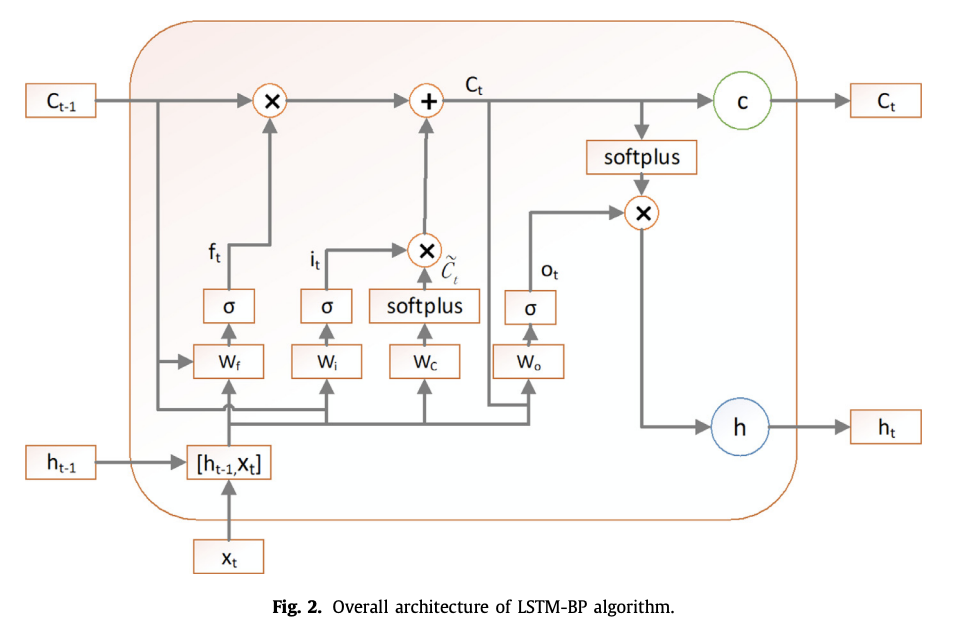

In [20]:
Image('/Users/sunjinkim/Workspace/Onepredict/MyGithub/paper_study/png_file/LSTM-BP_layer.png')


- LSTM 계산단위.
    - f_t : forget gate 
    - i_t : input gate
    - W_t : previous cell state
    - C_t : current cell state
    - O_t : Output gate
    - h_t : output of the current unit
    - h_t-1 : output of the previous unit 

    - σ : logical sigmoid function 
    - Wf,Wi,Wc,Wo : corresponding weight matrices 
    - bf,bi,bc,bo : corresponding deviation vectors

- LSTM network에서 information flow control은 forget gate, input gate, output gate (f,i,o)를 통해 구현된다. 

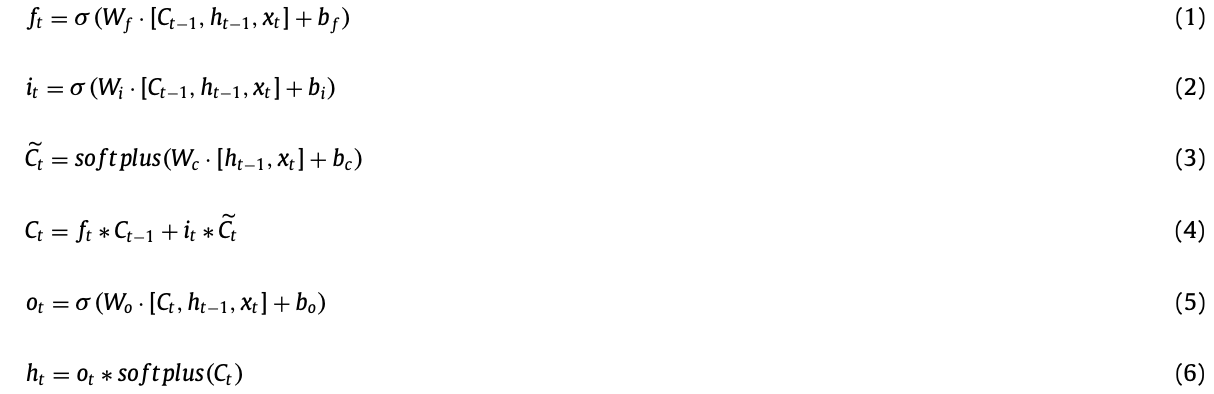

In [21]:
Image('/Users/sunjinkim/Workspace/Onepredict/MyGithub/paper_study/png_file/LSTM-calculation.png')

- forget door는 (1)과 같이 이전 memory h_t-1를 잊어버릴지 여부를 결정한다. 
- input gate (2)와 같이 입력 비율을 계산한다. 
- forget gate(ft)의 출력과 입력 게이트는 (4)에서 셀 Ct의 현재 상태의 출력을 결정한다.
- Output gate는 (5),(6)과 같이 현재 셀의 계산 결과를 출력할지 여부를 제어한다. 

#### 본 논문에서는 LSTM 연산장치의 입출력 활성화 함수로 soft-plus function 을 선택하고, 이는 (7)에 나와있다.
- y = log(1+e^x)     (7)


- Soft-plus function 은 신경망에서 뉴런 간의 전도 과정을 제어하는데 더 적합한 brain neuron 의 activation frequency 기능과 유사하다.
- 원래의 tanh 함수에 비해 수렴 속도를 향상 시키고, Over-fitting 및 gradient disappearance 문제를 완화한다 (TODO:이것들이 뭔지?)


- (1)~(6)에서 볼 수 있듯이 본 논문은 각 Cell의 상태를 forget gate, input gate, output gate 에 입력하여 셀 상태와 gate 간의 양방향 연관을 구현한다.
- 또한, peep-hold connection의 도움으로 LSTM 네트워크는 시계열 데이터에 더 많은 correlation을 기록할 수 있으므로,(TODO:Peep-hold?)
    특정 변동 법칙이 있는 시계열 데이터에서 관련 정보를 추출하는데 도움이 된다. 
- 따라서, LSTM 은 시계열 데이터를 보다 정화하게 학습하고, 기억할 수 있다. 

-  Convergence speed와 learning efficienc를 향상 시키고 traning 과정에서 발생하는 overfitting 문제를 해결하기 위해 LSTM 모델에 BatchNormalization(BN) layer 를 추가한다.

    - BN layer는 현재 Sergey loffe et al.에 의해 제안된 convergence를 가속화 하기 위한 일반적인 기술이다 [22]

### BN layer 
- BN layer의 장점은 수렴을 가속화하는 특성을 가지고있어 learning rate가 높아도 빠르게 수렴할 수 있다는 점이다. 

- 적절한 학습률을 선택하는 문제에 대해 걱정할 필요가 없다.

- 네트워크 일반화를 개선할 수 있다.

- 과적합 조건을 제어할 수 있는 능력을 통해 Dropout layer에 대한 의존도를 줄이고 (TODO : Dropout layer??) initialization weights에 대한 신경망의 insensitivity를 줄인다. 

- LSTM 네트워크 및 시계열 데이터에 대한 이상감지의 요구 사항에 대해 BN계층을 도입하면 training set에서 LSTM의 학습 효율성을 크게 향상 시키고 Dropout layer의 사용을 줄이며, LSTM model을 훈련할 때 convergence speed 속도를 크게 가속 시킬 수 있다. 



### LSTM 모델에 Dropout layer 추가 
- Overfitting 조건을 완화하기위해 LSTM 모델에 Dropout layer 를 추가한다. (??? : 위에선 Dropout layer의 의존도를 줄이기 위해 BN layer를 썼다면서..)

- Dropout은 과적합 문제를 해결하기 위해 일반적으로 사용되는 방법이다. [14]

- 이는 training 과정에서 parameter를 업데이트 할때 특정 확률로 네트워크에서 뉴런을 버리는 것이다.

- 이 방식은 뉴런 node간의 joint adaptability가 약해지고, 신경망이 co-adaptation 되는 것을 방지하고 generalization ability가 향상되어 과적합을 어느정도 방지한다. (TODO: 다 뭐냐,,?)

- BN layer의 이점을 통해 과적합 문제가 효과적으로 완화되어 LSTM 모델이 더 나은 convergence speed를 가지면서 동일한 우수한 training 효과를 달성한다.
    - 아까까진 Dropout layer라며,, Dropout layer 와 BN layer 의 차이점을 알아보자 

### 논문에서 사용한 Dense layer
- 이 논문에서는 LSTM 모델의 예측출력으로 Dense layer를 선택한다. 

- Dense layer는 완전 연결 계층 (Fully connected layer) 라고 한다

- Dense layer의 각 노드는 upper layer의 모든 노드에 연결 된다. 

- upper layer에서 추출한 characteristics를 결합하는데 사용되며, 이는 characteristic location이 분류에 미치는 영향을 크게 줄일 수 있다. [20] (TODO: 왜 영향을 줄이는가?)

- Dense layer는 출력값을 추출하고 단일값으로 결합하여 LSTM 모델의 예측 결과를 출력한다. 

### 4-3) Multivariate gaussian distribution and analysis

- Multivariate gaussian distribution는 정규 분포의 high-dimensional generalization이다. (TODO: 정규 분포의 고차원 일반화란?)

- 기존의 가우스 분포 모델은 특성간의 상관관계를 직접 활용 할 수 없으며, 특성을 새로운 특성으로 재구성 해야한다. (TODO: 왜?)

- 다변수 가우스모델은 기존의 모델과 달리 특성 변수간의 상관 관계를 자동으로 캡쳐 할 수 있으므로 연속 데이터 처리에 더 적합하다. (TODO: 왜??? - 기존 가우스 분포 모델과 다변수 가우스 모델의 차이점 알아보기)

- 그러나 계산 비용이 높고 대규모 특성 분류에는 적합하지 않으며, 특성의 차원보다 표본 크기가 훨씬 큰 조건에서만 효과적이다. ( TODO: ) -> [다변수 가우스 모델의 단점]

- 기존 가우시안 모델에 비해 다중 가우시안 모델이 더 까다롭지만, 특성간의 상관관계와 차원이 낮은 시계열 데이터를 처리하는데 더 나은 효과를 얻을 수 있다. 

### 4-3-1) Gaussian distribution 
- random variable(확률변수) : x 

- x 가 수학적 기대값이 μ이고, 분산이 σ2인 가우스 분포를 따르는경우, x는 가우스 분포를 따른다고 가정한다. 

- 따라서 아래와 같이 probability density function 을 설정 할수 있으며, 주어진 dataset (x1, ... , xm)에 대해 계산하면 아래와 같다.

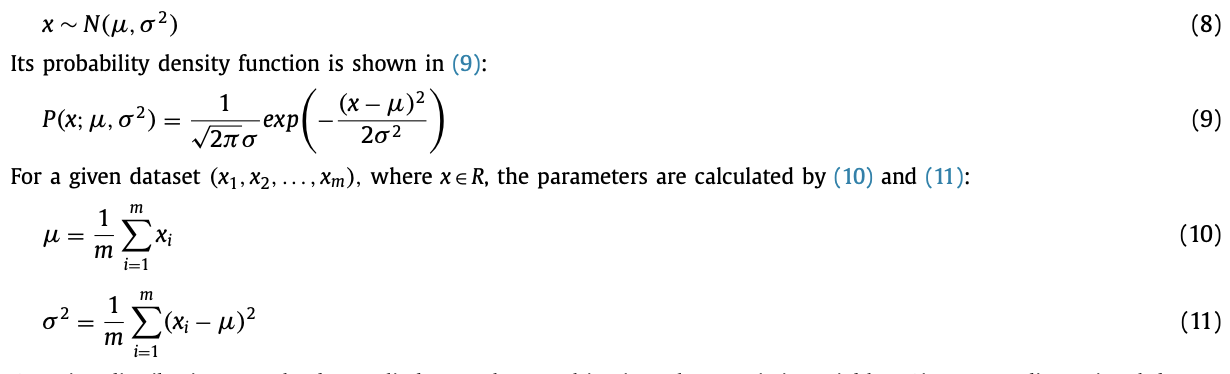

In [19]:
Image('/Users/sunjinkim/Workspace/Onepredict/MyGithub/paper_study/png_file/Gaussian_distribution.png')

- 또한, 이러한 가우시안 분포는 다변량 특성 변수를 분석하는데에도 적용 될 수 있다. 

- N 차원 데이터 세트 (x1,x2, ... , xm)이 주어지면, 각 샘플 x ∈ R 에 대해 아래와 같이 구현 가능하다. 

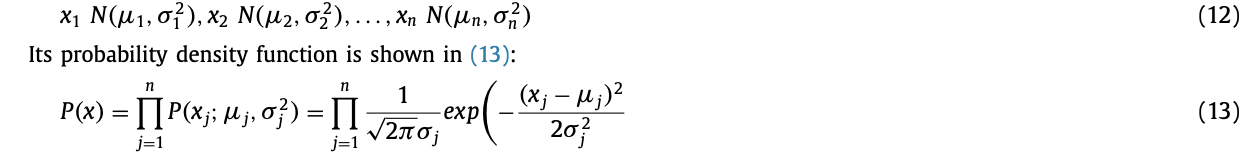

In [22]:
Image('/Users/sunjinkim/Workspace/Onepredict/MyGithub/paper_study/png_file/Multivariate_Gausian_distribution_확률밀도.png')

- 확률 밀도를 구한 후, 비교 임계값을 설정하여 이상 분류를 구현할 수 있다. 

- 다만, 위의 방법으로 구한 확률 밀도는 한가지 특성의 변화만을 고려하고, 무시해서는 안될 특성 변수간의 상관관계정보를 반영하지 않는다.

- multivariate Gaussian distribution model은 새로운 특성을 설정하지 않고도 서로 다른 특성 간의 관련성을 자동으로 포착 할 수 있다. 

### 4-3-2) Multivariate gaussian distribution
- 다변량 가우시안 분포는 아래와 같이 계산되었으며, 모든 특성에 대한 공분산 행렬 구성에 의해 계산되었다. 

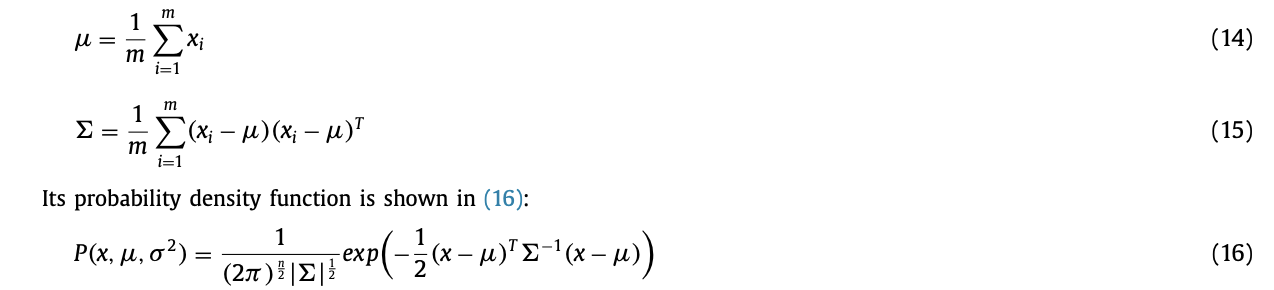

In [23]:
Image('/Users/sunjinkim/Workspace/Onepredict/MyGithub/paper_study/png_file/Multivariate_Gausian_distribution_calcul.png')

- (17)에 의해 계산된 확률 밀도 함수는 새로운 데이터를 분석하는 데 사용되며 P(x)를 적응 임계값과 비교하여 이상을 찾는다.

---
---
## 5) LGMAD 

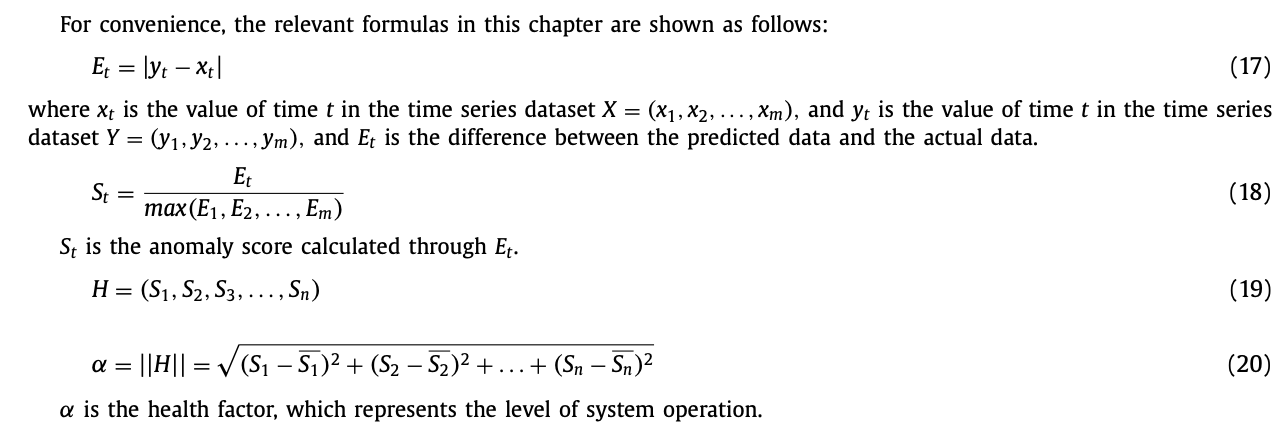

In [24]:
Image('/Users/sunjinkim/Workspace/Onepredict/MyGithub/paper_study/png_file/LGMAD.png')

- x_t는 시계열 데이터 세트 X = (x1,x2,..,xm)의 시간 t값이고, yt는 시계열 데이터 세트 Y = (y1,y2,..,ym)의 시간 t 값이다.

- Et 는 예측 데이터와 실제 데이터의 차이다.

- St는 Et를 통해 계산된 anomaly score이다.

- α : health factor (system operation level을 나타내는 상태 요소이다.)

- 3장에서 소개한 LSTM 네트워크는 시계열 데이터 처리에 매우 적합하다.
- 정규 샘플로 모델을 훈련 시킨 후, 시계열 데이터의 다음 시점의 가능한 값을 예측할 수 있다. 

- 시계열 데이터에서 특정 시간의 예측값을 실제값과 비교함으로써, 과거 행동과 결합된 차이에 따라 이상점이나 이상 영역을 효과 적으로 찾을 수 있다
    - 이 개념을 기반으로 본 논문에서는 개선된 LSTM 알고리즘을 사용하여 univariate time-series data에 대한 이상 탐지를 수행한다. 

    - 이 일변량 이상 탐지 알고리즘을 기반으로 다변량 데이터의 상관관계를 분석하기 위해 다변량 가우스 모델을 추가하고 LGMAD 알고리즘을 구현한다. state transition 다이어그램은 아래와 같다.

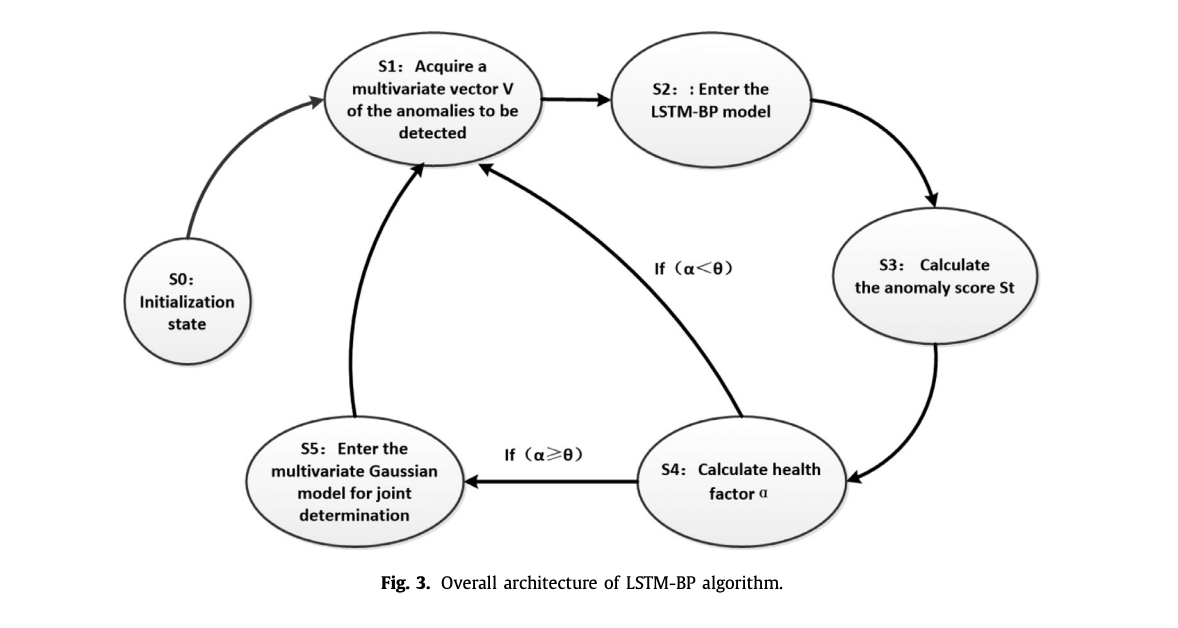

In [26]:
Image('/Users/sunjinkim/Workspace/Onepredict/MyGithub/paper_study/png_file/LGMAD_architecture.png')

LGMAD 알고리즘의 주요 프로세스는 위와 같으며, 설명은 이렇다.
1. S0 : 초기화 상태

2. S1 : detect할 anomaly의 multivariate vector를 얻는다. 

3. S2 : LSTM-BP 모델을 입력한다. 
    - 본 논문에서 설계된 LSTM-BP 모델은 획득된 vector V를 검출하는데 사용된다. 
    - [training 방법]
        - 이 논문은 3장에서 구축한 개선된 LSTM-BP 모델을 훈련하기 위해 많은 양의 정규 데이터를 사용하며,
        - training시 완전히 정상적인 데이터 세트를 사용한다
            - 기존 방법들은 태그가 지정된 비정상 데이터 세트가 필요함. 
            - 내 생각 : 라벨이 안되어있고, 정말 정상인지도 모르는데 어떻게 완전히 정상인 데이터를 사용한다는거지?
4. S3 : anomaly score St를 계산한다.
    - 시계열 데이터 세트 X = (x1,x2,..,xm)은 LSTM-BP모델을 사용하여 예측되며, Dense layer에서 얻은 결과는 Y 값이다. 예측 결과와 실제 squence간의 차이는 Et다

5. S4 : health factor α 를 계산한다. 

### health factor 
- 본 논문에서는 알고리즘 효율성을 향상 시키기 위해 (20), (21)로 정의된 health factor α 의 개념을 소개한다.

- health factor는 알고리즘의 시스템 성능을 나타낸다. 

- health factor를 사용하는 이유는 시스템 종류에 따라 변칙성의 정도가 다르기 때문이다. 

- 일상적인 작동에서 비 정상적 확률이 극히 낮은 시스템의 경우, 정상/비정상을 모두 탐지하기 위해 모든 데이터를 다변수 가우시안 모델로 가져오면 시스템 리소스가 낭비되고 알고리즘의 시간적 성능에도 영향을 미친다.

- α 가 Threshold θ보다 높을때만 데이터를 joint detection 을 위해 다변수 가우시안 모델로 가져와 알고리즘의 시간적 성능을 효과적으로 향상 시킬 수 있음을 강조한다. 

- Threshold θ는 시스템 상태에 따라 0 과 1 사이에서 dynamically selected 될 수 있다.
    - θ = 0 일때) 모든 데이터를 다변수 가우시안 모델로 가져와 joint determination 한다는 것을 의미하며, 이는 시스템 상태가 매우 비정상적인 조건에 해당된다.
    - θ = 1 일때) 시스템이 완전히 정상임을 나타내며, α의 값이 무엇이든 상관없이 joint determination을 위해 다변수 가우스 모델을 입력할 필요가없다.

- 이 알고리즘에서는 n 차원 벡터 V = (v1,v2,..,vn)을 시스템 입력으로 사용하고, 전처리 후 n차원 백터로 변환한다.  -> LSTM-BE 모델에서 직접 처리 가능 (TODO: LSTM-BE? BP?)

- 훈련된 LSTM-BE 모델은 n차원 벡터를 처리하고, anomaly score를 출력하고, α값을 계산하고, α를 θ와 비교하는데 사용된다.

-  α < θ 인 경우, 시스템은 정상으로 간주되며, 추가 단계가 필요하지 않으며, 이 반대는 이상이 발생한다 판단한다. 

6. S5: joint determination을 위한 다변량 가우스 모델을 입력하여 anomaly points 및 anomaly region 을 분류 한다.


---
---
## 6. Experiment and analysis

### 6.1. 실험 시나리오 및 데이터 세트

(1) Dataset1 : NAB dataset [23]

- LSTM-BP 알고리즘을 사용하여 NAB 데이터셋에서 CPU, 메모리, 네트워크 속도 데이터를 분리하여 탐지하고, HTM알고리즘, 기존 LSTM 알고리즘, 기존 LSTM 기반 BN layer 만 추가한 알고리즘(LSTM-BN)과 비교한다.

(2) Dataset2 : 실제 시나리오에서 시스템 상태를 기반으로 자체 제작한 데이터 셋
- 다차원 매개변수에서 시스템의 이상 특성화 및 감지를 수행하는데 사용됨.

- 실시간 상태를 더 잘 반영하기위해 Neusoft Reallnsight APM 소프트 웨어를 사용하여 시스템 상태의 실시간 매개변수를 수집한다. 
